1. Ustalenie zakresu danych 

2. Pobranie zdjęć z koordynatami

a) pobranie informacji o zdjęciach z bazy danych Sloan Digital Sky Survey (SDSS) za pomocą SDSS Query / CasJobs (https://skyserver.sdss.org/CasJobs/SubmitJob.aspx) do pliku csv

Poniższe zapytanie pobiera pierwsze 1000 obiektów z koordynatami i informacjami potrzebnymi do pobrania zdjęć.

![alt text](sdss_query.png "SDSS Query")

In [44]:
import pandas as pd
df = pd.read_csv("C:/Python_Marta/astro_project/image_list.csv")
df.head()

,objid,ra,dec,run,rerun,camcol,field
0,1237676302422379175,96.356700,6.654021,7178,301,1,206
1,1237676302411825797,75.012809,-4.752014,7178,301,1,45
2,1237676302414185026,79.756687,-2.216747,7178,301,1,81
3,1237676302422705529,96.900687,7.113349,7178,301,1,211
4,1237676302412743368,76.890922,-3.724654,7178,301,1,59


b) pobranie zdjęć na podstawie listy koordynatów ze strony skyserver.sdss.org

In [45]:
import requests
import csv

def fetch_sdss_image(ra, dec, scale=0.2, width=512, height=512):
    url = f"http://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?ra={ra}&dec={dec}&scale={scale}&width={width}&height={height}&opt=N"
    response = requests.get(url)
    if response.status_code == 200:
        filename = f"sdss_image_{ra}_{dec}.jpg"
        with open(filename, "wb") as file:
            file.write(response.content)

# wczytanie danych z pliku CSV i pobranie obrazów
# with open('image_list.csv', newline='') as csvfile:
#     reader = csv.DictReader(csvfile)
#     for row in reader:
#         fetch_sdss_image(row['ra'], row['dec'])

3. Wczytywanie i przetwarzanie obrazów

In [46]:
import matplotlib.pyplot as plt
import cv2
import random
import os 

In [47]:
# Losowanie zdjęcia z folderu
folder_path = "C:/Python_Marta/astro_project/images/"
files = os.listdir(folder_path)
random_image = random.choice(files)
file_path = os.path.join(folder_path, random_image)
print(f'File name: {random_image}')


File name: sdss_image_80.0319553273644_-2.15328575383908.jpg


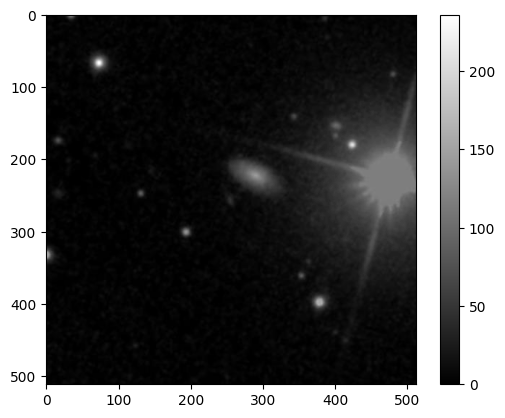

In [48]:
from skimage import filters

# Odczyt obrazu za pomocą OpenCV
image_data = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Użyj filtra, aby usunąć szum i wyostrzyć obiekty
image_filtered = filters.median(image_data, behavior='ndimage')

plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.show()

4. Identyfikacja gwiazd i galaktyk

In [49]:
from skimage import measure

# Wykryj obiekty na obrazie
threshold = filters.threshold_otsu(image_filtered)
binary_image = image_filtered > threshold

# Znajdź kontury obiektów
contours = measure.find_contours(binary_image, level=0.8)

# Klasyfikacja obiektów
stars = []
galaxies = []

for contour in contours:
    area = cv2.contourArea(contour.astype(np.int32))
    if area < 100:  # Zdefiniuj próg dla małych obiektów jako gwiazdy
        stars.append(contour)
    else:
        galaxies.append(contour)

# zrobić filtrowanie po kształcie obiektu, nie po wielkości

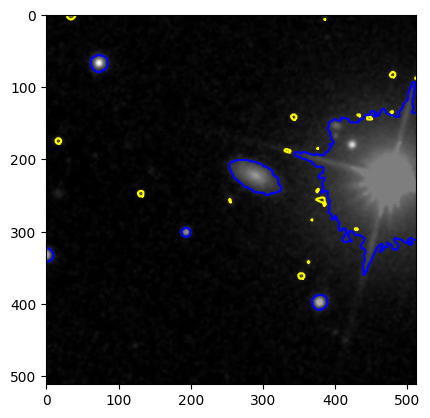

In [50]:
# Wyświetlenie obrazu z oznaczonymi gwiazdami i galaktykami
plt.imshow(image_data, cmap='gray')

for star in stars:
    plt.plot(star[:, 1], star[:, 0], color='yellow')

for galaxy in galaxies:
    plt.plot(galaxy[:, 1], galaxy[:, 0], color='blue')

plt.show()

5. Określenie koordynat zdjęcia

In [51]:
# Centralne koordynaty zdjęcia
center_ra = random_image.replace('.jpg', '').split('_')[2]
center_dec = random_image.replace('.jpg', '').split('_')[3]

print(f'Center RA: {center_ra}')
print(f'Center DEC: {center_dec}')

Center RA: 80.0319553273644
Center DEC: -2.15328575383908


6. Określenie koordynat gwiazd i galaktyk

In [ ]:
# określenie koordynat